# **Hands-on Assignment 9: Hypothesis Testing**

##**Introduction**
Here you will gain experience applying hypothesis tests to uncover statistical significance.

The data you will be using a dataset published by The National Heart, Lung and Blood Institute (NHLBI) from a clinical trial known as the Digitalis Investigation Group (DIG) Trial. This data contains baseline and outcome information for chronic heart failure patients from the DIG Trial cohort who received either the drug Digoxin or a placebo. Here, outcomes have been recorded under two main categories, cardiovasular mortality and hospitalization.

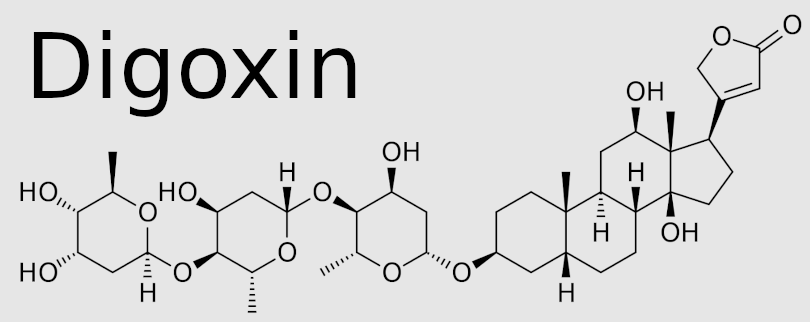

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous sections to perform the hypothesis tests indicated below. You will be graded based on correct execution and interpretation of your hypothesis tests.

##**Steps**

Using the DIG dataset, perform the following hypothesis tests on variables of your choosing. They must be different from the examples in the previous section.

You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results. When necessary, you may make up necessary population parameters (ex. mean and standard deviation).

In [ ]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2')
df

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
0,1,0,66,1,1,40,2,0.50,20.073,NaN,...,1,533,1,533,6,0,1438,NaN,1,1379
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
2,3,0,72,1,2,36,1,0.68,25.530,5.1,...,0,1391,1,631,2,0,1391,NaN,1,631
3,4,1,57,1,1,31,1,0.48,25.794,NaN,...,0,1157,0,1157,0,0,1157,NaN,0,1157
4,5,0,74,1,1,15,1,0.53,25.654,4.0,...,1,459,1,191,5,0,1550,NaN,1,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,6796,0,73,1,1,23,1,0.58,28.975,NaN,...,0,546,1,505,1,1,546,1.0,1,546
6796,6797,1,39,1,1,15,1,0.46,22.097,4.0,...,0,1419,0,1419,0,0,1419,NaN,0,1419
6797,6798,1,55,1,1,23,1,0.62,26.221,NaN,...,0,582,1,549,1,1,582,2.0,1,549
6798,6799,1,56,1,1,29,1,0.44,26.651,4.3,...,1,572,1,340,6,1,928,1.0,1,515


In [ ]:
# For the columns contain numeric measurements, let's delete any rows that contain NaN values in those columns as they may break downstream calculations.
df_reduced=df.dropna(subset=['KLEVEL','CHFDUR','CHESTX','BMI','HEARTRTE','DIABP','SYSBP','DIGDOSE','HYPERTEN'])

**One-sample Z-Test**

<font color='red'>Type your null and alternative hypotheses here.</font>

For one-sample Z-Test:

We want to know if there is any significant difference between the mean value of patient's age in the sample and the mean value the people's age in the U.S. (Obtained from the webset) Thus, we need to look at the z-score and two-tailed p value.

 H0: x = populationMean

 H1: x ≠ populationMean

x refers to the mean of samples(n=6800) in our study.

In [ ]:
def oneSampleZTestForMeans(sample, popMean, popStdDev):
  """
  Peform a one-sample z-test for means to compare a sample mean (x̄) to
  a known population mean mu (μ) when the population standard deviation sigma (σ)
  is known. Then, print the z-score with p-values for one-sided and two-sided tests.

  This test assumes the variable in question is continuous
  and it is either normally distributed or its sample size is at least 30.

  Arguments:
    ・sample (list or Pandas Series): The list of values
    ・mu (int or float): The known population mean
    ・sigma (int or float): The known population standard deviation
  """
  import numpy as np
  import scipy.stats as stats

  sampleMean = np.mean(sample)
  sampleSize = len(sample)

  # Calculate the z-score.
  stdDevOfSamplingDistribution = popStdDev/np.sqrt(sampleSize)
  zScore = (sampleMean - popMean)/ stdDevOfSamplingDistribution

  # Calculate the p-values.
  oneSidedPValue = stats.norm.sf(abs(zScore))
  twoSidedPValue = oneSidedPValue*2

  results = ( f'z-score = {zScore}\n'
              f'one-sided p-value = {oneSidedPValue}\n'
              f'two-sided p-value = {twoSidedPValue}'
            )

  print(results)

In [ ]:
# Age distribution of America obtained from the website
populationMean = 38.1
populationStdDev = 21
oneSampleZTestForMeans(df_reduced['AGE'], populationMean, populationStdDev)

z-score = 92.9122298626294
one-sided p-value = 0.0
two-sided p-value = 0.0


<font color='red'>Type your interpretation of the test here.</font>

A z-score of 92.91 is extremely high. In a standard normal distribution, z-scores typically range from about -3 to +3, with values beyond this range being very rare and indicating extreme cases.

Such a high z-score suggests that the sample mean of our study is extremely different from the population mean(38.1). However, a z-score this high is highly unusual and might indicate an error in the calculation or data.

A p-value of 0.0 indicates that if we assume the null hypothesis is true, the probability of observing a result is zero. Thus, we reject the null hypothesis that there is no significance differences between the sample mean and population mean, and accept the point that there is an ***obvious significance*** between sample mean and population mean.

**One-sample t-Test**

$$ H_0: The\ data\ follows\ the\ chosen\ distribution\ (normal) $$
$$ H_1: The\ data\ does\ not\ follow\ the\ chosen\ distribution\ (normal) $$

In [ ]:
# The assumption to apply a one-sample t-Test is that the sample size need to small(less than 30)
# Let's randomly choose 30 sample from the whole dataframe
import scipy.stats as stats

sampleofrandom = df_reduced.sample(n=30, random_state=1)['BMI']  # random_state is set for reproducibility
# Let's test if our sample follows a normal distribution
stats.shapiro(sampleofrandom)

ShapiroResult(statistic=0.9691722393035889, pvalue=0.5167809128761292)

<font color='red'>Type your interpretation of the test here.</font>

The test statistic is a measure of how closely the sample distribution matches a normal distribution. The closer this value is to 1, the more the sample distribution resembles a normal distribution. In our case, the value of statistic is colse to 1.

The p-value(0.52) is greater than 0.05, we fail to reject the null hypothesis of the test, which states that the sample is from a normally distributed population.

Now you can apply the One-sample t-Test.

<font color='red'>Type your null and alternative hypotheses here.</font>

For one-sample t-Test:

Based on the previous test, we have known that patients involved in our study are elderly people.

We want to know if there is any significant difference between the mean value of patient's BMI in the random sample(n=30) and the mean value the elderly people's BMI in the U.S. (Obtained from the webset: "That is, a healthy BMI in older people must range between 23 and 28 in people aged 55 to 65, and between 24 and 29 in people aged 66 or older." We assume that the average BMI is 26.5, and do not know the standard deviation.)

 H0: x = populationMean

 H1: x ≠ populationMean

x refers to the mean of samples(n=5965) in our study.


In [ ]:
import scipy.stats as stats
populationMean = 26.5
stats.ttest_1samp(sampleofrandom, populationMean, alternative = 'two-sided')

TtestResult(statistic=-1.9990257826820628, pvalue=0.05505468198736743, df=29)

<font color='red'>Type your interpretation of the test here.</font>

p-value > 0.05; thus, the null hypothesis is accepted, which indicates that there is no significance difference of patients' BMI in our study and elderly peoples' BMI.

**Standard Independent T-test (2-samples)**

At the very begining, you should apply a Kolmogorov-Smirnov(n>=50) to make sure that your samples are normally distributed.

$$ H_0: The\ data\ follows\ the\ chosen\ distribution\ (normal) $$
$$ H_1: The\ data\ does\ not\ follow\ the\ chosen\ distribution\ (normal) $$

We would like to test if the heart failure duration under death group and non death group follows the normal distribution.

In [ ]:
import scipy.stats as stats
death = df_reduced.loc[df_reduced['DEATH'] == 1,'CHFDUR']
non_death = df_reduced.loc[df_reduced['DEATH'] == 0,'CHFDUR']
result_3 = stats.ks_2samp(death,non_death)
print(result_3)

KstestResult(statistic=0.010238527222572513, pvalue=0.9985754645951878, statistic_location=74.0, statistic_sign=-1)


Results from the Kolmogorov-Smirnov show that the KS statistics, representing the maximum difference between the empirical cumulative distribution functions of the two samples. A smaller value indicates that the distributions of the the two samples are more similar. The p-value is close to 1, which means that the evidence is not strong enough to reject the null hypothesis; thus, the distribution of 'CHFDUR' in two groups are the same.

In the next step, let's apply the levene test to see if two groups have equal variances.

$$ H_0: The\ variance\ among\ groups\ is\ equal $$

$$ H_1: The\ variance\ among\ groups\ is\ not\ equal\ for\ at\ least\ one\ pair $$


In [ ]:
stats.levene(death,non_death)

LeveneResult(statistic=0.021394134867862232, pvalue=0.8837152913801725)

<font color='red'>Type your interpretation of the test here.</font>

 The p-value is 0.884, which is much larger than the common alpha level of 0.05, thus, there's no statistically significant evidence to suggest that the variances between the 'death' and 'non_death' groups in the 'CHFDUR' column are different.

Now, Let's apply the independent t-test:

 H0: sampleMean1 = sampleMean2

 H1: sampleMean1 ≠ sampleMean2


In [ ]:
stats.ttest_ind(death,non_death,alternative = 'two-sided', equal_var=True)

TtestResult(statistic=0.1344382152454556, pvalue=0.8930606016583117, df=5963.0)

<font color='red'>Type your interpretation of the test here.</font>

The p-value is larger than the common alpha level of 0.05; thus, there is no statistically significant evidence to suggest that the mean of heart failure duration months within non-death group is not equal to that mean within death group.

**Welch's T-test (2-samples)**

At the very begining, you should apply a Kolmogorov-Smirnov(n>=50) to make sure that your samples are normally distributed.


---

$$ H_0: The\ data\ follows\ the\ chosen\ distribution\ (normal) $$
$$ H_1: The\ data\ does\ not\ follow\ the\ chosen\ distribution\ (normal) $$

We would like to test if the heart rate(beats/minute) follows the normal distribution within BMI > 30 group and BMI < 20 group.

In [ ]:
import scipy.stats as stats
HeartRate1 = df_reduced.loc[df_reduced['BMI']>30,'HEARTRTE']
HeartRate2 = df_reduced.loc[df_reduced['BMI']<20,'HEARTRTE']
result = stats.ks_2samp(HeartRate1,HeartRate2)
print(result)

KstestResult(statistic=0.07756917553822013, pvalue=0.0861106129165632, statistic_location=76.0, statistic_sign=-1)


pvalue>0.05, H0 is accepted; meaning that the heart rate(beats/minute) follows the normal distribution within BMI > 30 group and BMI < 20 group.

Now, you can do the levene test to see if variances within two groups are the same:

$$ H_0: The\ variance\ among\ groups\ is\ equal $$

$$ H_1: The\ variance\ among\ groups\ is\ not\ equal\ for\ at\ least\ one\ pair $$


In [ ]:
stats.levene(HeartRate1,HeartRate2)

LeveneResult(statistic=0.4525654779075649, pvalue=0.50120921350892)

Since pvalue is larger than the 0.05, then we say that there is no significant evidence showing that the variance of heart beats rate among two different BMI groups are the same.

But let's assume that there is an type 2 error occur where the variance of heart beats rate is not equal for at least one pair, but we just failed to reject H0:

Now, we can apply the Welch's t-test now:

<font color='red'>Type your null and alternative hypotheses here.</font>

Now, Let's apply the independent t-test:

 H0: BMILargerthan30Mean = BMISmallerthan20Mean

 H1: BMILargerthan30Mean ≠ BMISmallerthan20Mean

In [ ]:
stats.ttest_ind(death,non_death,alternative = 'two-sided', equal_var=False)

TtestResult(statistic=0.13474169707989664, pvalue=0.8928224496339782, df=4273.515379176192)

<font color='red'>Type your interpretation of the test here.</font>

The p-value is larger than the common alpha level of 0.05; We accept the null hypothesis- there is no statistically significant evidence to suggest that the mean of heart beats rate within BMI larger than 30 group is not equal to that mean within BMI smaller than 20 group.

Then, perform a **Paired T-test**. You must state your null and alternative hypotheses, run the hypothesis test, and provide an interpretation of your results.

<font color='red'>Type your null and alternative hypotheses here.</font>

Assume that before our CXPT 501 course begin, there was a pretest, the total score is 100 and each student's score was recorded. And after taking a whole semester class, we had a final exam and every one's score is recorded. We want to know if our class significantly enhance student's grade on biomedical data science.

data = {'Before': [60, 55, 20, 30, 38, 47, 56, 77, 12, 65, 32, 24, 68, 74, 51, 59 ],
'After' : [85, 83, 86, 78, 98, 84, 83, 85, 89, 91, 92, 77, 71, 74, 99, 81, 79 ] }

$$ H_0: μ_d = 0 $$
$$ H_1: μ_d > 0 $$

μd means sample mean difference(mean of score before test and after test)

In [ ]:
score = {'Before': [60, 55, 20, 30, 38, 47, 56, 77, 12, 65, 32, 24, 68, 74, 51, 59 ],
'After' : [85, 83, 86, 78, 98, 84, 83, 85, 89, 91, 92, 77, 71, 74, 99, 81 ] }
paired_df = pd.DataFrame(score)
stats.ttest_rel(paired_df['After'],paired_df['Before'])

TtestResult(statistic=6.3521987908441275, pvalue=1.2986642831648161e-05, df=15)

<font color='red'>Type your interpretation of the test here.</font>
pvalue is significantly smaller than the confidence level - 0.05, meaning that result is highly unlikely falls into the reject region. Thus, we reject H0 and accept H1. The courese helped a lot with students' grades.